<a href="https://colab.research.google.com/github/Skirchen/Munging/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KaggleDiabetesPrediction/playground-series-s5e12/train.csv')

In [ ]:
df.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['education_level'].value_counts()

,count
education_level,
Highschool,344145
Graduate,261268
Postgraduate,79642
No formal,14945


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

<Axes: >

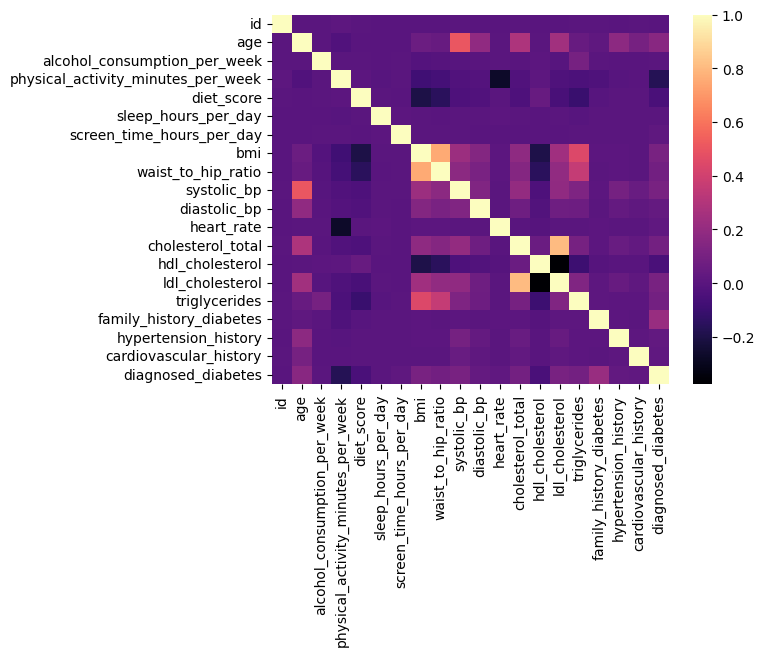

In [ ]:
sns.heatmap(df.select_dtypes(include='number' ).corr(), cmap='magma')

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'smoking_status', 'employment_status'],
      dtype='object')

In [ ]:
num_cols = df.select_dtypes(include='number').columns.drop(['diagnosed_diabetes', 'id'])
num_cols

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history'],
      dtype='object')

In [ ]:
X = df.drop(['diagnosed_diabetes','id'], axis=1)
X

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,...,126,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed,0,0,0
699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,...,119,Female,Hispanic,Graduate,Upper-Middle,Former,Employed,0,0,1
699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,...,166,Female,White,Graduate,Middle,Never,Employed,0,0,0
699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,...,133,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0


In [ ]:
y = df['diagnosed_diabetes']
y

,diagnosed_diabetes
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
699995,0.0
699996,1.0
699997,1.0
699998,1.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    penalty='elasticnet',
    l1_ratio=1,
    C=3,
    verbose=2,
    n_jobs= 1,
)

In [ ]:
log_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', logreg)
])

In [ ]:
log_clf.fit(X_train, y_train)

convergence after 31 epochs took 29 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.3s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_choles...
       'triglycerides', 'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'smoking_status', 'employment_status'],
      dtype='object'))])),
                ('logreg',
                 LogisticRegression(C=3, class_weight='balanced', l1_ratio=1,
                                    max_iter=1000, n_jobs=1,
                                    penalty='elasticnet', solver='saga',
                                    verbose=2))])

In [ ]:
predictions = log_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
print(accuracy_score(y_test, ypred))
print(precision_score(y_test, ypred))
print(recall_score(y_test, ypred))
print(f1_score(y_test, ypred))
print(confusion_matrix(y_test, ypred))
fpr, tpr, thresholds = roc_curve(y_test, ypred)
print(roc_auc_score(y_test, ypred))

0.6523142857142857
0.6499464809270434
0.9594114953057018
0.774925323444277
[[ 7529 45131]
 [ 3545 83795]]
0.5511926447284301


<Axes: >

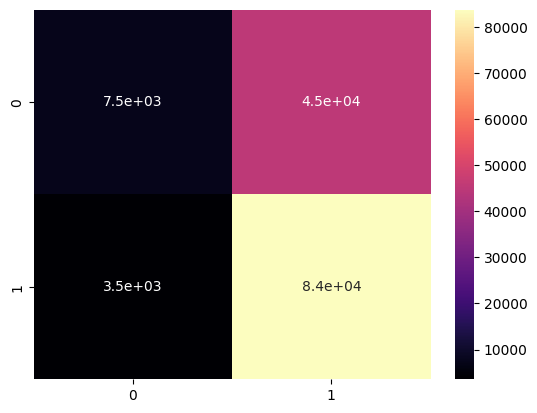

In [ ]:
sns.heatmap(confusion_matrix(y_test, ypred), cmap='magma', annot=True)

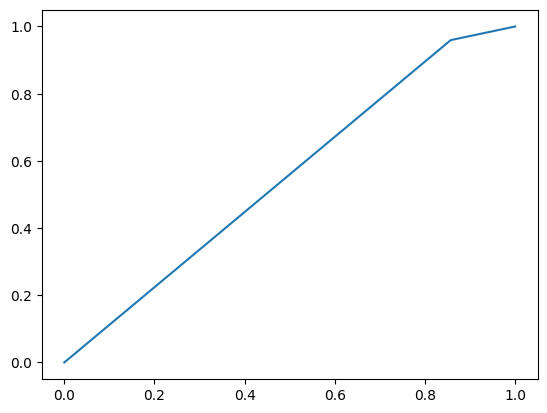

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
probs = log_clf.predict_proba(X_test)[:,1:]

In [ ]:
proba_target = np.concatenate((probs, y_test.values.reshape(-1,1)), axis=1)

<Axes: >

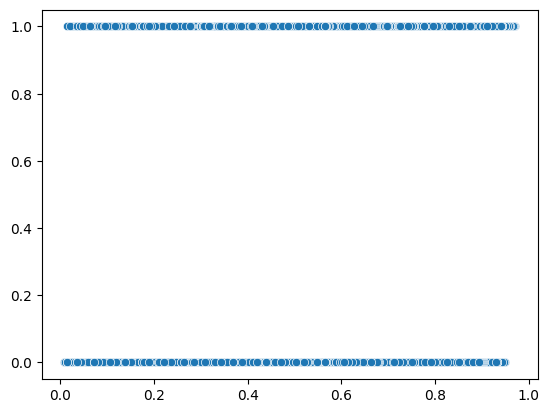

In [ ]:
sns.scatterplot(x=proba_target[:,0], y=proba_target[:, 1])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
param_grid = {
   "logreg__l1_ratio": [.5, 1, 1.5]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rs = RandomizedSearchCV(
    log_clf,
    param_distributions=param_grid,  # can still be list-of-dicts
    verbose= 2,
    scoring="roc_auc",
    cv=cv,
    n_jobs=1,
    random_state=42
)
rs.fit(X_train, y_train)

rs.best_score_, rs.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
convergence after 70 epochs took 43 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.9s finished


[CV] END ...............................logreg__l1_ratio=0.5; total time=  47.6s
convergence after 49 epochs took 29 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.3s finished


[CV] END ...............................logreg__l1_ratio=0.5; total time=  30.7s
convergence after 66 epochs took 39 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.9s finished


[CV] END ...............................logreg__l1_ratio=0.5; total time=  41.4s
convergence after 35 epochs took 22 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s finished


[CV] END .................................logreg__l1_ratio=1; total time=  23.7s
convergence after 25 epochs took 15 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s finished


[CV] END .................................logreg__l1_ratio=1; total time=  17.8s
convergence after 34 epochs took 20 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


[CV] END .................................logreg__l1_ratio=1; total time=  23.6s
[CV] END ...............................logreg__l1_ratio=1.5; total time=   1.6s
[CV] END ...............................logreg__l1_ratio=1.5; total time=   0.9s
[CV] END ...............................logreg__l1_ratio=1.5; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_

convergence after 31 epochs took 28 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.6s finished


(np.float64(0.6945134760853068), {'logreg__l1_ratio': 1})

In [ ]:
thresholds = np.linspace(0.01, 0.99, 200)
f1_scores = []

for t in thresholds:
    y_pred = (probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

best_threshold, best_f1

(np.float64(0.2907035175879397), 0.7748585492683423)

In [ ]:
threshold = .29

In [ ]:
ypred = (probs >= threshold).astype(int)

In [ ]:
ypred

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
y_challenge = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KaggleDiabetesPrediction/playground-series-s5e12/test.csv')

In [ ]:
challenge_preds = log_clf.predict(y_challenge)

In [ ]:
challenge_preds.T

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
challenge_ans = pd.DataFrame([y_challenge['id'].T, challenge_preds.T], index=['id', 'diagnosed_diabetes']).T

In [ ]:
challenge_ans.values

array([[700000, 0],
       [700001, 0],
       [700002, 1],
       ...,
       [999997, 0],
       [999998, 0],
       [999999, 0]], dtype=object)

In [ ]:
challenge_ans[['id', 'diagnosed_diabetes']] = challenge_ans[['id', 'diagnosed_diabetes']].convert_dtypes(convert_integer= True)

In [ ]:
challenge_ans.to_csv('/content/submission.csv', index= False)

In [ ]:
from google.colab import files
files.download('/content/submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    max_features="sqrt",
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    verbose=2,
    n_jobs=-1,
    random_state=42,
)

In [ ]:
X_trans = preprocessor.fit_transform(X_train)

In [ ]:
X_trans

array([[ 0.14110831,  1.83738734,  3.59389987, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4596206 ,  0.88404566,  0.50463405, ...,  0.        ,
         0.        ,  0.        ],
       [-2.09017049,  2.79072903,  4.12181239, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.14616792, -1.02263771, -0.80537108, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54543901,  0.88404566,  0.13314006, ...,  0.        ,
         0.        ,  0.        ],
       [-1.14616792,  1.83738734, -0.25790625, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_trans.shape

(560000, 42)

In [ ]:
rf_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', rf)
])

In [ ]:
rf_clf.fit(X_train, y_train)

In [ ]:
rf.fit(X_trans, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81

KeyboardInterrupt: 

In [ ]:
preds = rf.predict(preprocessor.transform(X_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    9.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   11.5s finished


In [ ]:
preds

array([1., 0., 1., ..., 1., 1., 0.])

In [ ]:
#Defaults
print(accuracy_score(y_test, preds))
print(precision_score(y_test, preds))
print(recall_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
fpr, tpr, thresholds = roc_curve(y_test, preds)
print(roc_auc_score(y_test, preds))

In [ ]:
#n_estimators 400
print(accuracy_score(y_test, preds))
print(precision_score(y_test, preds))
print(recall_score(y_test, preds))
print(f1_score(y_test, preds))
print(confusion_matrix(y_test, preds))
fpr, tpr, thresholds = roc_curve(y_test, preds)
print(roc_auc_score(y_test, preds))

<Axes: >

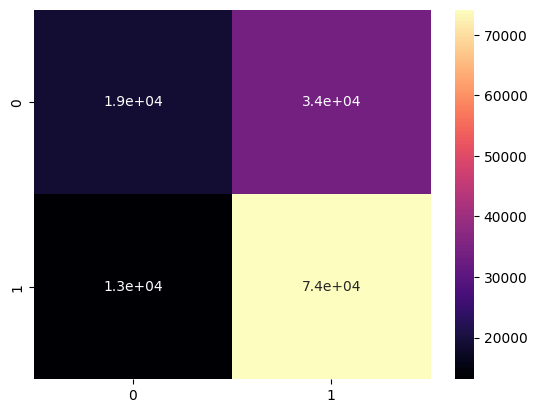

In [ ]:
sns.heatmap(confusion_matrix(y_test, preds), cmap='magma', annot=True)

In [ ]:
df['diagnosed_diabetes'].value_counts()

,count
diagnosed_diabetes,
1.0,436307
0.0,263693


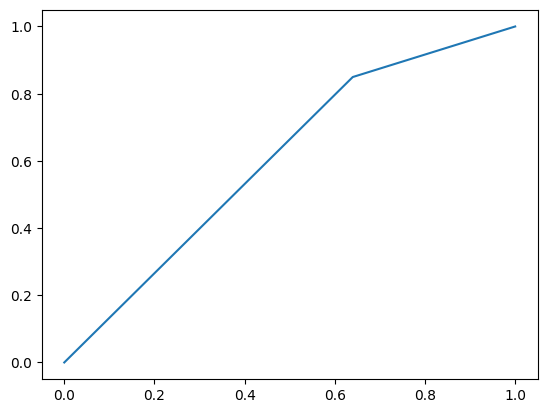

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
param_dist = {
    "n_estimators": [400],
    "max_depth": [15],
    "min_samples_leaf": [3],
    "max_features": ["sqrt"]
}

rs = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=8,          # sweet spot
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [ ]:
rs.fit(X_trans, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=8. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 